# Import libraries

In [1]:
#from matplotlib.pyplot import * 
#from numpy import *
import pynested_fit as pynf
import os

%matplotlib inline
#%matplotlib widget
#%matplotlib notebook

In [2]:
# Define the present path as root path
root_path = os.getcwd()
print(root_path)

path = root_path+'/res_1gauss_bg'

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks


# Visualize some old results without running the code

0 max
nf_output_data_max.dat


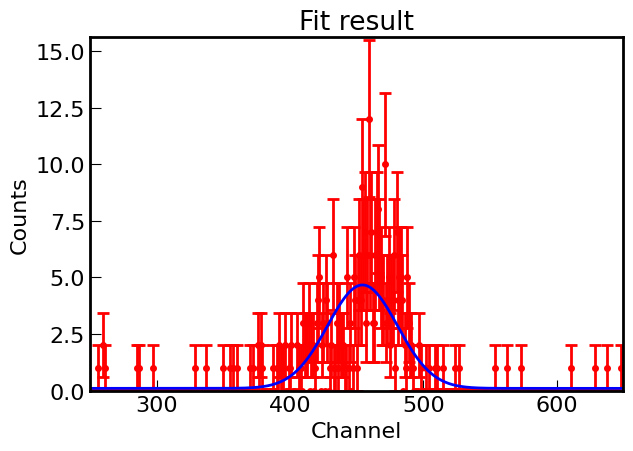

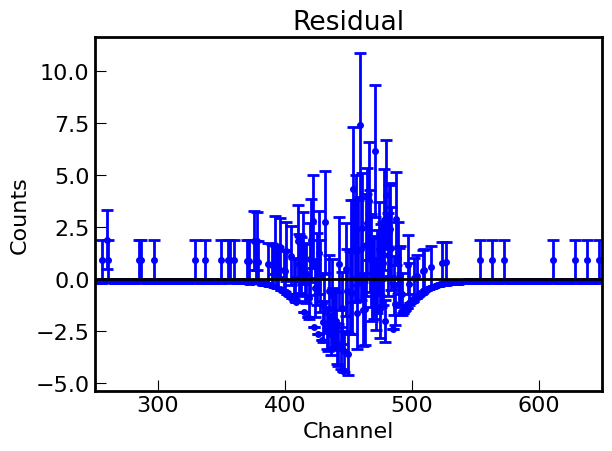

In [3]:
# Visualize results in another directory

# Load the library without loading the adata
an_test = pynf.Analysis(loaddata=False)

# Define a directory and look inside
an_test.plot(path=path)

# Run the code in a specific directory

In [3]:
# Go to a define analysis
os.chdir(path)
print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_1gauss_bg


### Example of legacy function use from USERFCN.f

In [4]:
# Define inputs using a "legacy" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=['GAUSS_BG'],
    params={                    # Function expression from legacy
        'b_g': {'value': 0.01,  'step': -1, 'min': 0, 'max': 0.3 ,   'npar': 1},
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 , 'npar': 2},
        'A_1': {'value': 300,   'step': -1, 'min': 0, 'max': 500 ,   'npar': 3},
        's':   {'value': 20,    'step': -1, 'min': 10, 'max': 30 ,   'npar': 4}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=1,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

### Example of latex function

In [5]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = A_1 / (s \sqrt{2\pi}) \exp{-(x-x_1)^2/(2s^2)} + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

### Example of use of internal or already defined latex function

In [6]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form
        r'gauss_bg(x, A_1, x_1, s, b_g) = \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [7]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')
# If nothing shows, use simply the command (symlink to created or version to be used)
# run_nested_fit

# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: \texttt{GAUSS_IF}(x, x_1, A_1, s) + b_g
Infix expression: GAUSS_IF(x,x1,A1,s)+bg
      Parameters: A_1, b_g, s, x_1
| N. try:  1 | N. step:        100 | Min. loglike:   -1503.998241262347165 | Evidence:   -1513.338857049545823 | Ev. step:   -1513.569661559210999 | Ev. pres. acc.:  1.1738886E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1303.320256610938259 | Evidence:   -1313.601274955026611 | Ev. step:   -1313.925350930363493 | Ev. pres. acc.:  9.7467271E+02 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1223.675132730068526 | Evidence:   -1230.612155343238328 | Ev. step:   -1231.080590339430046 | Ev. pres. acc.:  8.9158359E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1158.217977585557264 | Evidence:   -1164.136324614323030 | Ev. step:   -1165.628347709646960 | Ev. pres. acc.:  8.

# Visualize the results

In [12]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['A_1', 'x_1', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'A_1', 'x_1', 's', 'b_g']


0 max
nf_output_data_max.dat


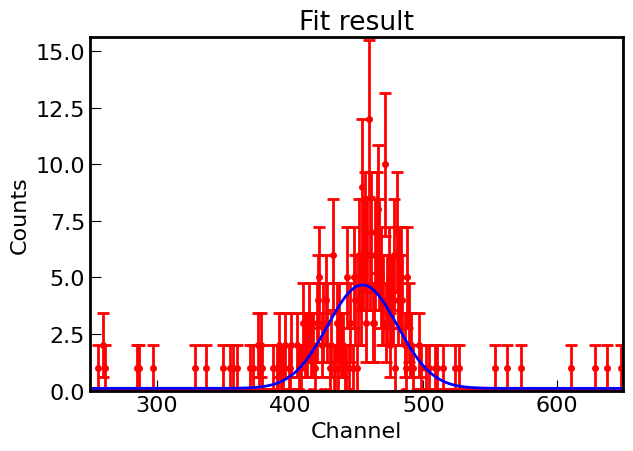

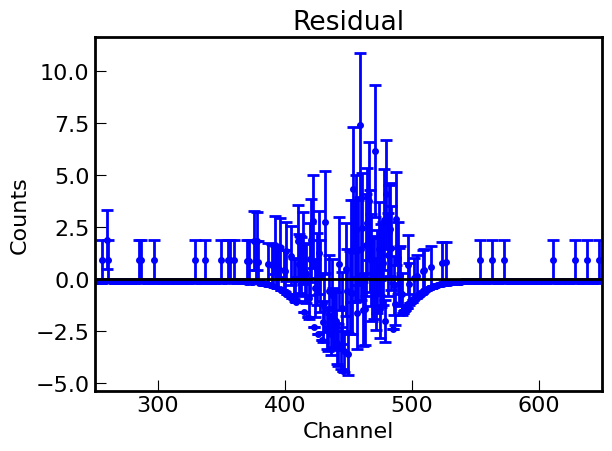

In [13]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

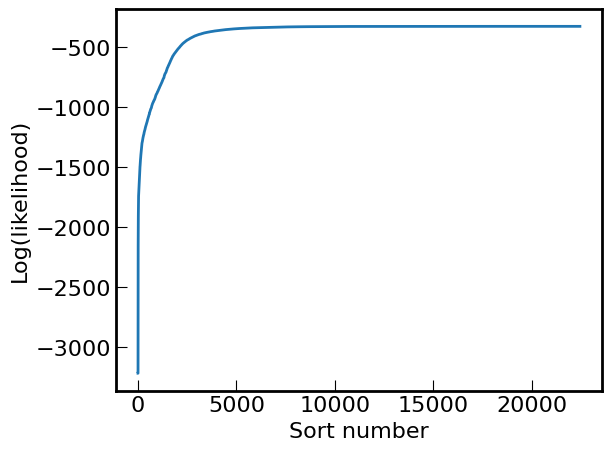

In [14]:
# Plot the likelihood sampling 
an.plot_like()

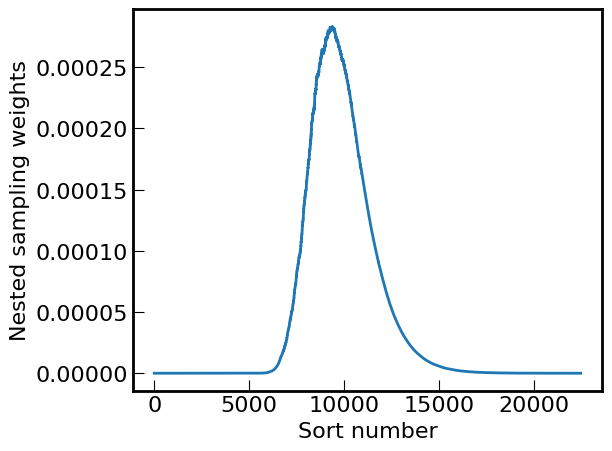

In [15]:
# Plot the weights of nested sampling corresponding to w_n = Delta X_n L_n
an.plot_weights()

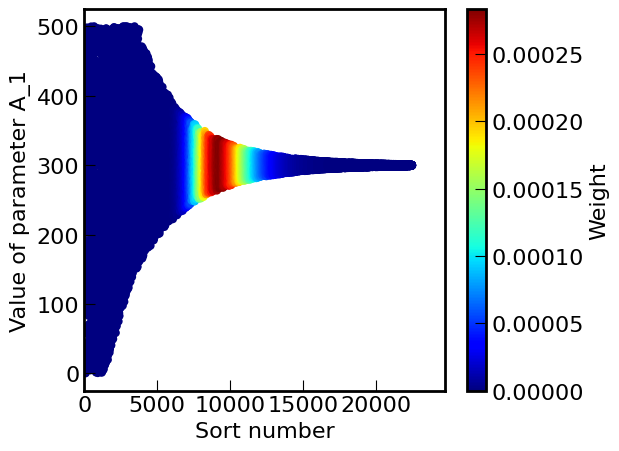

In [16]:
# Plot the parameter convergence
# Colored regions correspond to the high value of the weights
an.plot_par('A_1')

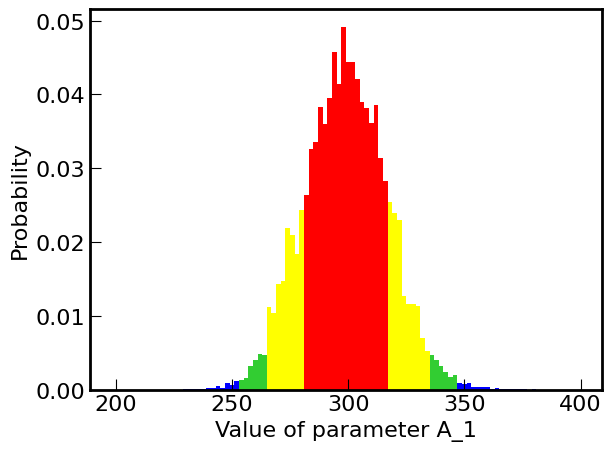

In [17]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=200,xmax=400)

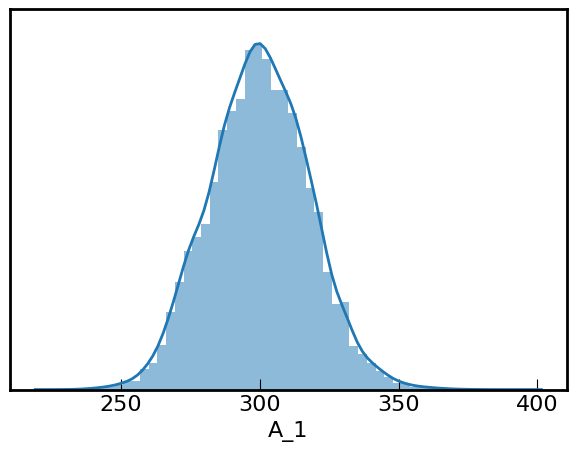

In [18]:
# Plot one parameter interpolated histogram using getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo_interp('A_1',path=path)

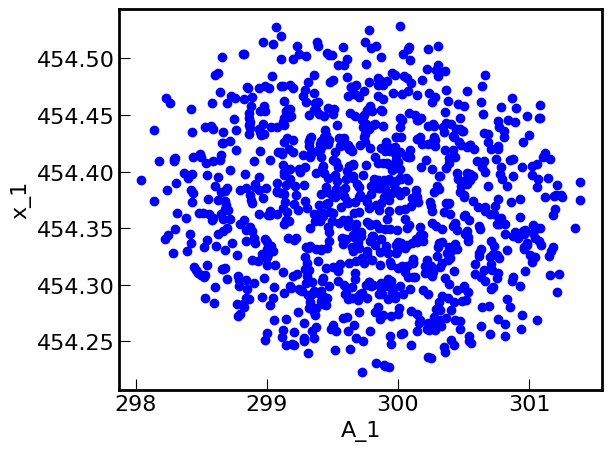

In [19]:
an.plot_live('A_1','x_1')

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

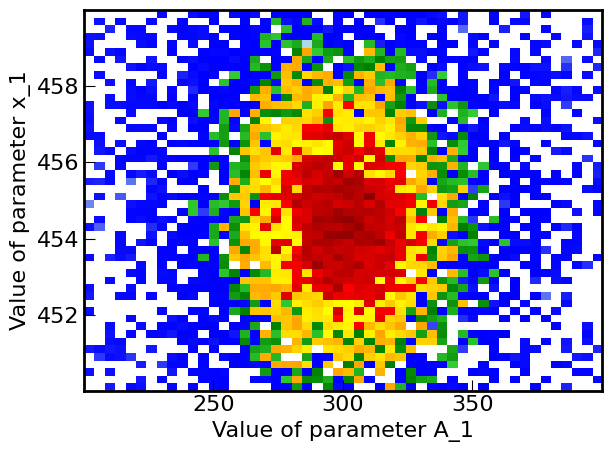

In [20]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=50,xmin=200,xmax=400,ymin=450,ymax=460)

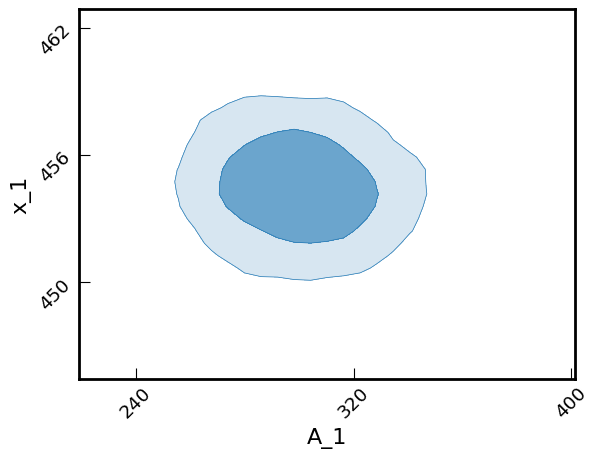

In [21]:
# Same with interpolation from getdist
# Note: this is a third part function and it requires to specify the path explicitally
an.histo2D_interp('A_1','x_1',path=path)


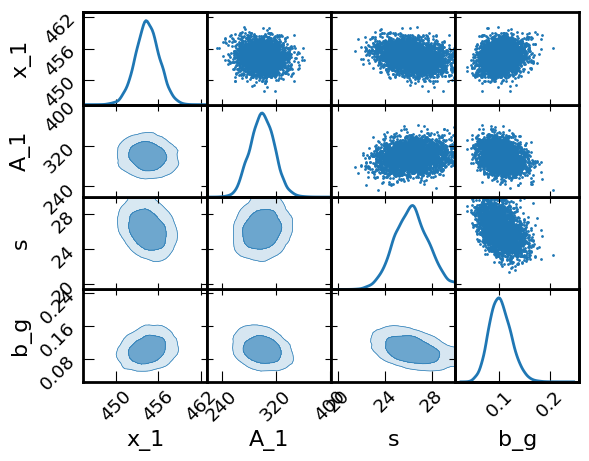

In [22]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1','A_1','s','b_g'])

# Extract important data and post-processing
The results can be extracted by the output of the python function: `out = conf.sample()`
Alternatively, another function can be used to read the output ASCII files (`output = an.read_output()`) or the `.json` finles

### Using the python function output

In [8]:
# Extract the raw information of evidence
out[ 'evidence']

{'stddev': 0.0,
 'uncertainty': 0.08962022029446345,
 'value': -338.15814326362056}

In [9]:
# Specific information of output parameters
par_name = 'x_1'
print(par_name, ' = ', out['params'][par_name][ 'mean'],' ± ', out['params'][par_name][ 'std'])

x_1  =  454.44967028340983  ±  1.6821219042900168


In [10]:
# Miscelaneous information
out['meta']

{'bayes_complexity': 3.793968143674988,
 'information': 8.031783885628158,
 'minimal_req_it': 3077,
 'ncores': 10,
 'timereal': 5.678301000036299,
 'timetotal': 14.386082}

### Using the built in function 'read_output'

In [23]:
# Read the output files in a dictionnary
out = an.read_output()

# Print some results

# The evidence
print('Evidence = ', out['evidence'],'±',out['evidence_err_est'])

# The Bayesian complexity
print('Complexity = ', out['complexity'])

# Some parameter
par_name = 'x_1'
par_index = out['par_name'].index('x_1')
print(par_name, ' = ', out['mean'][par_index],' ± ', out['sd'][par_index])

Evidence =  -338.15814326362056 ± 0.08962022029446345
Complexity =  3.793968143674988
x_1  =  454.44967028340983  ±  1.6821219042900168


In [24]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -338.142453 	± 0.091081
D_KL 	 = 8.014946 	± 0.090288
logL_P 	 = -330.127507 	± 0.027884
d_G 	 = 3.727334 	± 0.089469


# Combine latex functions with library functions

## Two Gaussian plus background

In [25]:
# Define a directory 
path = root_path+'/res_2gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_2gauss_bg


### Run the code

In [26]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'double_gauss_bg(x, x_1, x_2, A_1, A_2, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [27]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+bg
      Parameters: A_1, A_2, b_g, s, x_1, x_2
| N. try:  1 | N. step:        100 | Min. loglike:   -1597.851359322354710 | Evidence:   -1605.722814969240517 | Ev. step:   -1605.777537479601278 | Ev. pres. acc.:  1.2660471E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1420.703091411096466 | Evidence:   -1427.589146114007917 | Ev. step:   -1428.032147913789004 | Ev. pres. acc.:  1.0878135E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1301.718236021274834 | Evidence:   -1308.886344882450430 | Ev. step:   -1309.507735214865988 | Ev. pres. acc.:  9.6901066E+02 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        400 | Min. loglike:   -1206.729952713216562 | Evidence:   -1213.9049

### Visualize the results 

In [28]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g'], dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'A_1', 'A_2', 's', 'b_g']


0 max
nf_output_data_max.dat


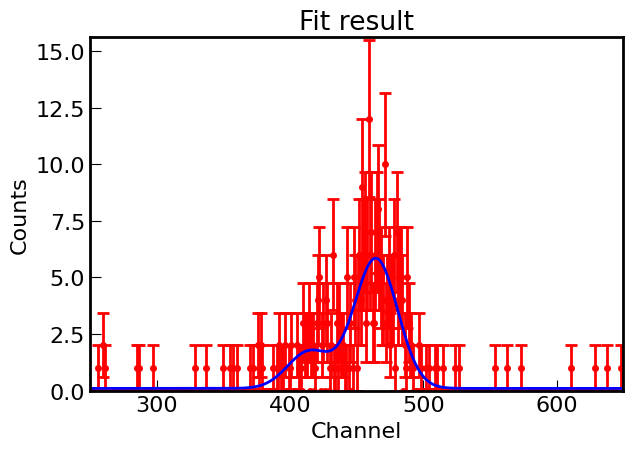

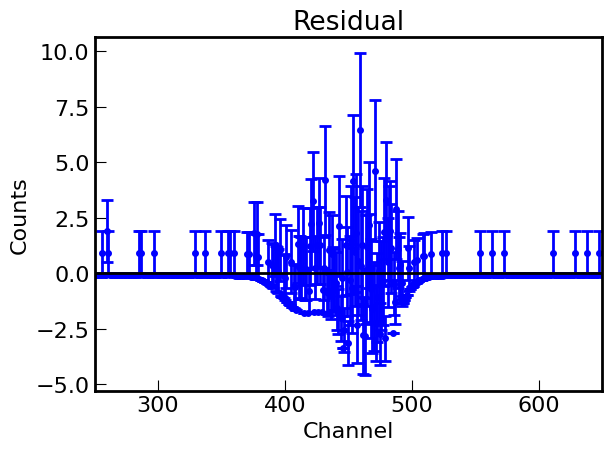

In [29]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

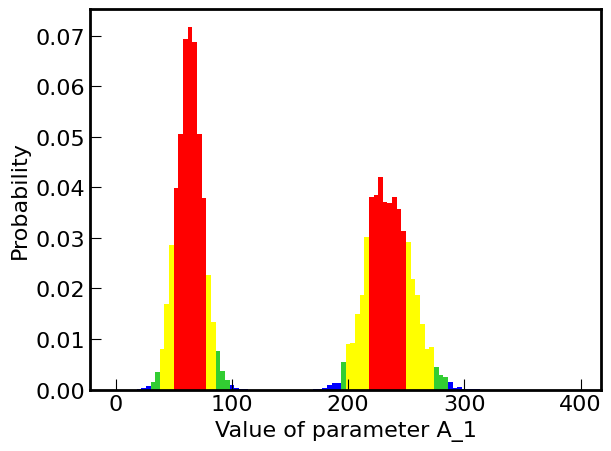

In [30]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

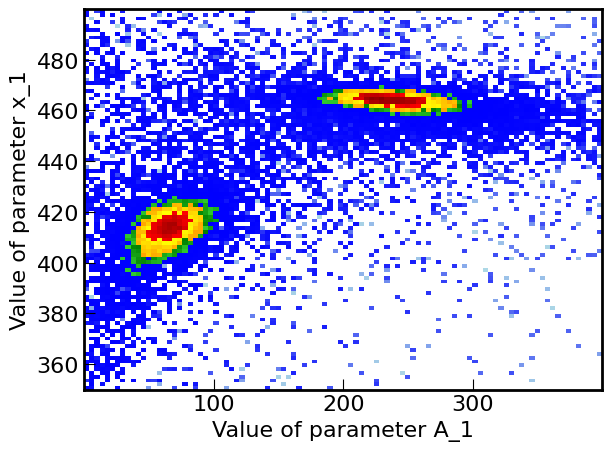

In [31]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

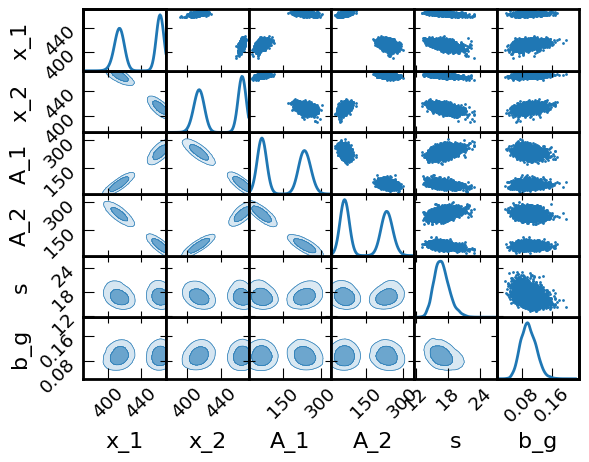

In [32]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [33]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -324.271537 	± 0.127733
D_KL 	 = 13.341767 	± 0.118832
logL_P 	 = -310.929770 	± 0.043577
d_G 	 = 6.314000 	± 0.154771


## Three Gaussian plus background

In [34]:
# Define a directory 
path = root_path+'/res_3gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_3gauss_bg


### Run the code

In [35]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'triple_gauss_bg(x, x_1, x_2, x_3, A_1, A_2, A_3, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_3, A_3, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_3': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=1000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=100000,           # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=False,             # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [36]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + \texttt{GAUSS_IF}(x, x_3, A_3, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+GAUSS_IF(x,x3,A3,s)+bg
      Parameters: A_1, A_2, A_3, b_g, s, x_1, x_2, x_3
| N. try:  1 | N. step:        100 | Min. loglike:   -1686.793080941564767 | Evidence:   -1694.570503370988035 | Ev. step:   -1695.140410044762802 | Ev. pres. acc.:  1.3350399E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -1519.797110577748299 | Evidence:   -1526.498886949365215 | Ev. step:   -1526.997079169423614 | Ev. pres. acc.:  1.1668683E+03 | Typical eff.: 0.7500 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -1361.629189662027102 | Evidence:   -1370.318987280386864 | Ev. step:   -1370.978956056340621 | Ev. pres. acc.:  1.0105884E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        40

### Visualize the results 

In [37]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's',
       'b_g'],
      dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'A_1', 'A_2', 'A_3', 's', 'b_g']


0 max
nf_output_data_max.dat


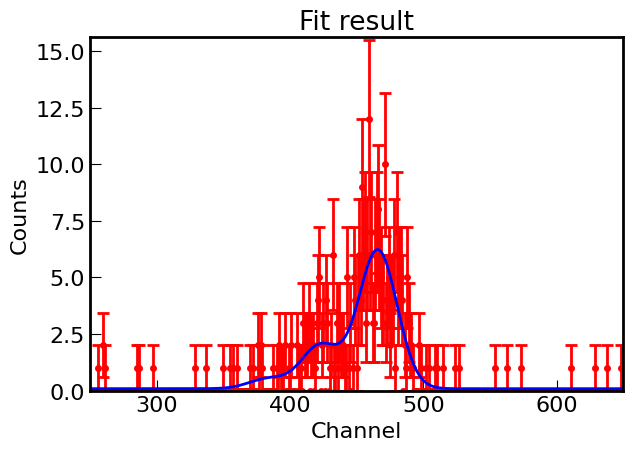

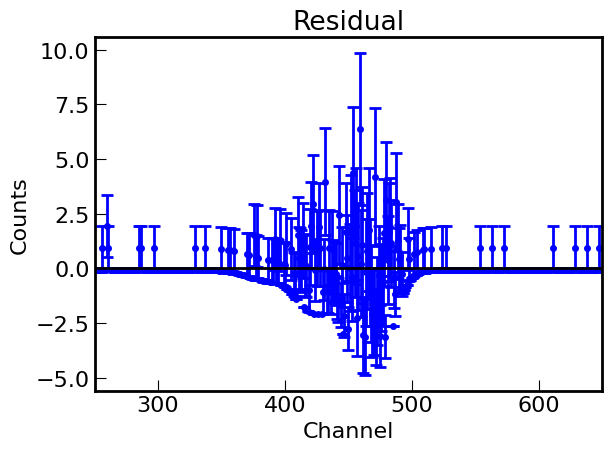

In [38]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

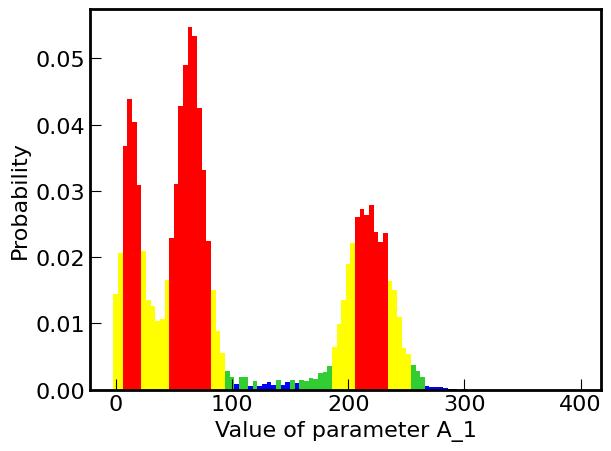

In [39]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

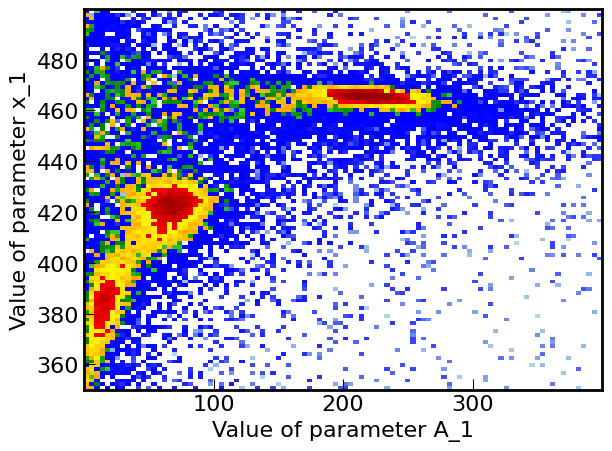

In [40]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

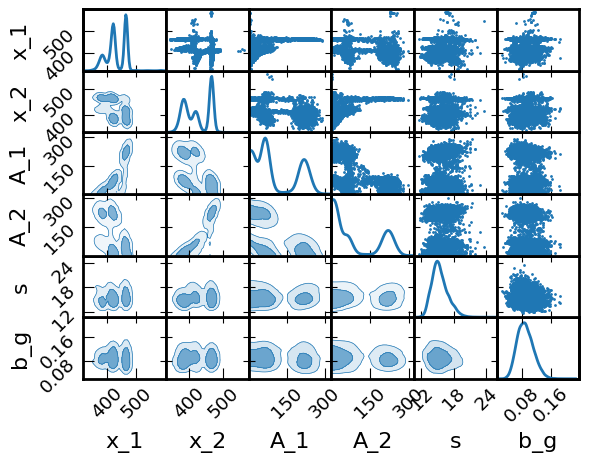

In [41]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

In [42]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -324.833373 	± 0.130408
D_KL 	 = 16.718569 	± 0.124561
logL_P 	 = -308.114804 	± 0.078614
d_G 	 = 13.300463 	± 0.296304


## Four Gaussian plus background

In [43]:
# Define a directory 
path = root_path+'/res_4gauss_bg'
# Go to a define analysis
os.chdir(path)

print(path)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/examples/jupyter_notebooks/res_4gauss_bg


### Run the code

In [44]:
# Define inputs using a "latex" function
conf = pynf.Configurator(
    datafiles=['he-histo.dat'], # Name of the data file
    filefmt='.tsv',             # Format of file (here for tab and space separated)
    specstr='x,c',              # Datafile layout (here ch. and counts in ch.)
    expressions=[               # Function expression in latex form using an internal function (twice)
        r'four_gauss_bg(x, x_1, x_2, x_3, x_4, A_1, A_2, A_3, A_4, s, b_g) =' + 
        r' + \texttt{GAUSS_IF}(x, x_1, A_1, s)' +  # These additional "+" are to write in more than one line
        r' + \texttt{GAUSS_IF}(x, x_2, A_2, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_3, A_3, s)' + 
        r' + \texttt{GAUSS_IF}(x, x_4, A_4, s) + b_g'], 
    params={                    # function expression in latex form
        'b_g': {'value': 0.01,  'step': -1, 'min': 0,   'max': 0.3 },
        'x_1': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_2': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_3': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'x_4': {'value': 454.6, 'step': -1, 'min': 300, 'max': 600 },
        'A_1': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_2': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_3': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        'A_4': {'value': 300,   'step': -1, 'min': 0,   'max': 500},
        's':   {'value': 20,    'step': -1, 'min': 10,  'max': 30}
    },
    data={'xmin': 250, 'xmax': 650},  # Boundaries of data
    livepoints=10000,                  # Number of live points
    search_method='SLICE_SAMPLING',   # Search method
    search_params=(0.5, 3),           # Parameters of chosen method
    search_maxsteps=1000000,          # Max steps of nested sampling
    conv_accuracy=1.E-05,             # Evidence final accuracy
    # num_tries=4,                    # Number of run of the same analysis for error estimation
    cluster_enable=True,              # clustering recognition on/off
    # cluster_method='k',             # method used
    # cluster_parameter1=0.5,         # method parameter 1 (if needed)
    # cluster_parameter2=0.2,         # method parameter 1 (if needed)
)

In [45]:
# Run the code

# For visualising the progress of the execution use this command
out = conf.sample(output_mode='')


# For silently running the code and save the raw output in a dictionnary, use this command
# out = conf.sample(output_mode='none')

========= Parsing result =========
     Latex input: + \texttt{GAUSS_IF}(x, x_1, A_1, s) + \texttt{GAUSS_IF}(x, x_2, A_2, s) + \texttt{GAUSS_IF}(x, x_3, A_3, s) + \texttt{GAUSS_IF}(x, x_4, A_4, s) + b_g
Infix expression: +GAUSS_IF(x,x1,A1,s)+GAUSS_IF(x,x2,A2,s)+GAUSS_IF(x,x3,A3,s)+GAUSS_IF(x,x4,A4,s)+bg
      Parameters: A_1, A_2, A_3, A_4, b_g, s, x_1, x_2, x_3, x_4
| N. try:  1 | N. step:        100 | Min. loglike:   -2304.522106872947461 | Evidence:   -2318.434030026414348 | Ev. step:   -2318.946437051936755 | Ev. pres. acc.:  1.9765360E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        200 | Min. loglike:   -2187.251519680647561 | Evidence:   -2196.987443824917591 | Ev. step:   -2197.099062136060638 | Ev. pres. acc.:  1.8550794E+03 | Typical eff.: 1.0000 |                
| N. try:  1 | N. step:        300 | Min. loglike:   -2089.909781139789175 | Evidence:   -2099.621504736123825 | Ev. step:   -2100.185558616218714 | Ev. pres. acc.:  1.7577034E+03 | Typica

### Visualize the results 

In [46]:
# Load the nested output data
# The available parameters and other variables that can be plotted are listed
an=pynf.Analysis()

Current path =  .
['x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's', 'b_g']
Index(['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2',
       'A_3', 'A_4', 's', 'b_g'],
      dtype='object')
Available parameters : ['weight', 'lnlikelihood', 'x_1', 'x_2', 'x_3', 'x_4', 'A_1', 'A_2', 'A_3', 'A_4', 's', 'b_g']


0 max
nf_output_data_max.dat


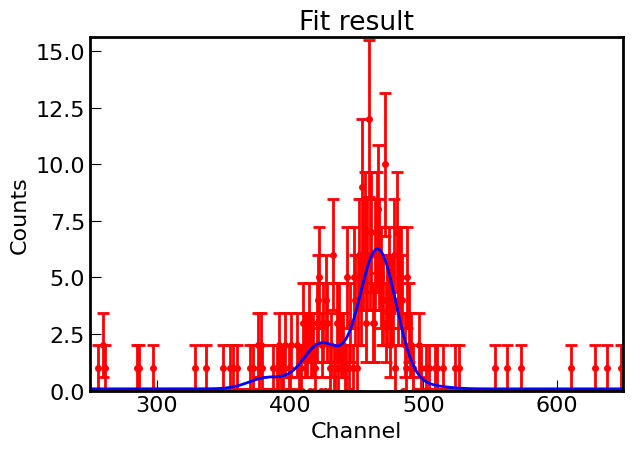

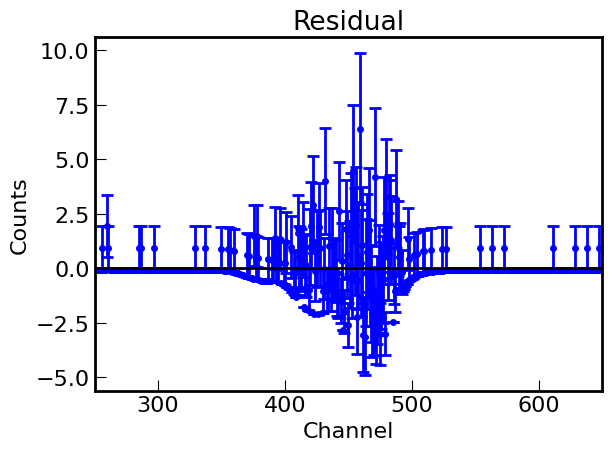

In [47]:
# Plot the data with the best fit (parameters corresponding to the maximum value of the data) and residual
# Other choices are median and mean parameters values selectable with "typeof='mean'" and "typeof='median'"
an.plot()

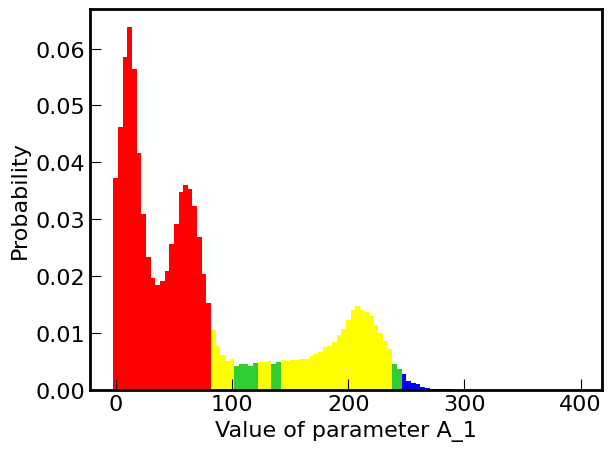

In [48]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo('A_1',bins=100,xmin=0,xmax=400)

/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1108: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data68[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb68)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1109: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data95[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb95)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1110: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data99[::-1,]),interpolation='nearest',extent=extent,aspect='auto',cmap=rvb99)
/Users/martino/Nextcloud/CNRS/work/programs/nested_fit/nested_fit/pynested_fit/nested_res.py:1111: RuntimeWarning: divide by zero encountered in log
  plt.imshow(log(histo2D_data_rest[::-1,]),interpolation='nearest',extent=extent,aspect='aut

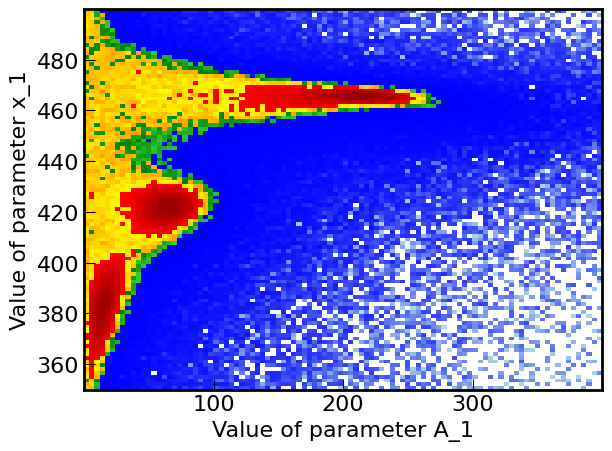

In [49]:
# Plot one parameter histogram
# Red, yellow and green region correspond to 1,2,3 sigmas
an.histo2D('A_1','x_1',bins=100,xmin=0,xmax=400,ymin=350,ymax=500)

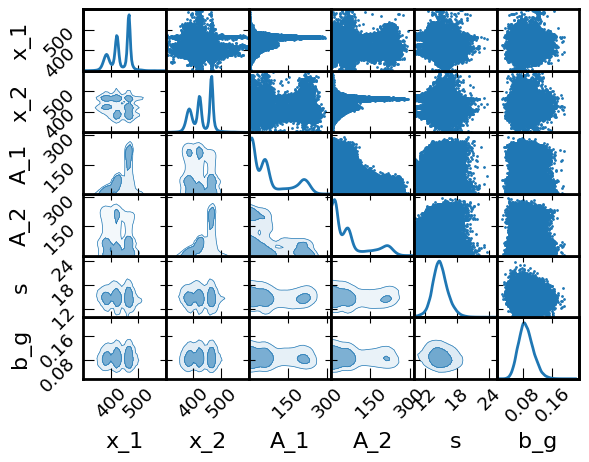

In [50]:
# Triangle plot (from anesthetic) to have a look to all parameters at the same time
an.triangle_plot(['x_1', 'x_2', 'A_1', 'A_2','s','b_g'])

Taking the last available file
Showing file  nf_output_cluster_final_20240928_163443.dat
Number of clusters: 20


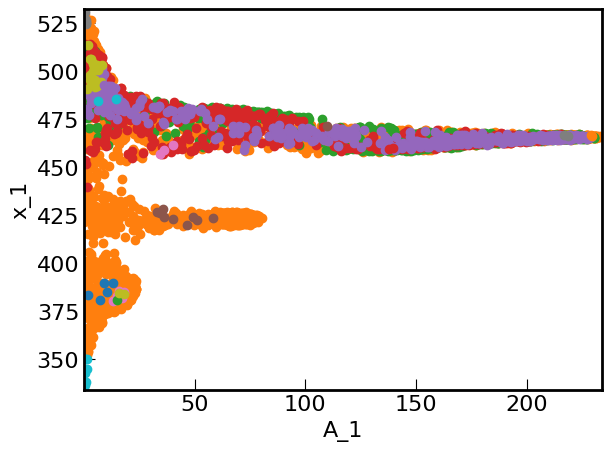

In [51]:
# If a cluster analysis have been done, visualize the clusters
## in 2D
an.plot_clusters('A_1','x_1')

Taking the last available file
Showing file  nf_output_cluster_final_20240928_163443.dat
Number of clusters: 20


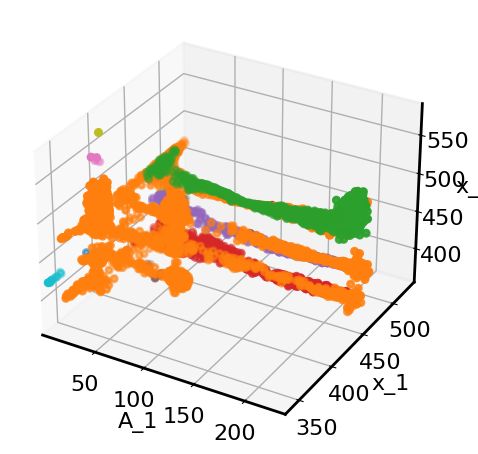

In [52]:
## and in 3D
an.plot_clusters3D('A_1','x_1','x_2')

In [53]:
# Statistics (from anesthetic) to have a good estimation of the uncertainties (expecially for the evidence)
an.stats()

logZ 	 = -326.509123 	± 0.040143
D_KL 	 = 18.855079 	± 0.039689
logL_P 	 = -307.654044 	± 0.021625
d_G 	 = 11.510402 	± 0.080897
